In [6]:
# uncomment if gensim is installed
#!pip install gensim
import gensim
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [7]:
# load pre-trained word2vec embeddings
# The embeddings can be downloaded from command prompt:
# wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300-SLIM.bin', binary=True)

In [8]:
# Test the loaded word2vec model in gensim
# We will need the raw vector for a word
print(model['computer']) 

# We will also need to get the words closest to a word
model.similar_by_word('computer')

[ 0.04081374 -0.07643302  0.04675029  0.08051439 -0.03469168  0.08236956
 -0.0500896   0.03153789  0.07680405  0.01818067  0.01391378 -0.00932223
  0.00909033 -0.06084958 -0.00992516  0.03691789 -0.02411721  0.07012544
  0.06493096 -0.06196269 -0.04155581  0.05676821 -0.00017682  0.03654685
  0.06418889  0.00099136  0.03394962  0.02467376  0.01354274 -0.02634342
 -0.05565511 -0.04600822 -0.08645093  0.00932223 -0.04730684 -0.1209571
 -0.0838537   0.04971856  0.01391378 -0.01382102 -0.04303995  0.07420681
  0.03710341  0.04823443  0.0250448   0.02634342  0.00389586  0.06678613
 -0.06418889  0.00046089 -0.11353642 -0.04378202  0.02151998 -0.0675282
 -0.07940128  0.06715716  0.00904396 -0.09795299 -0.01697481  0.07160957
  0.02096342  0.01910825 -0.04062823  0.0719806  -0.04415305  0.03227996
 -0.06530199  0.09312955 -0.06604406 -0.00315379  0.01734584 -0.00612206
  0.0708675  -0.02300411 -0.0158617   0.06938337  0.0838537  -0.04656477
 -0.00969326 -0.11724676  0.03469168  0.06084958  0.0

[('computers', 0.7979379892349243),
 ('laptop', 0.6640493273735046),
 ('Computer', 0.6473335027694702),
 ('PC', 0.5539618730545044),
 ('laptops', 0.5517531633377075),
 ('PCs', 0.5517113208770752),
 ('Computers', 0.5511513948440552),
 ('software', 0.5444109439849854),
 ('desktop', 0.5066721439361572),
 ('hacker', 0.49671587347984314)]

In [9]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()


 


<IPython.core.display.Javascript object>


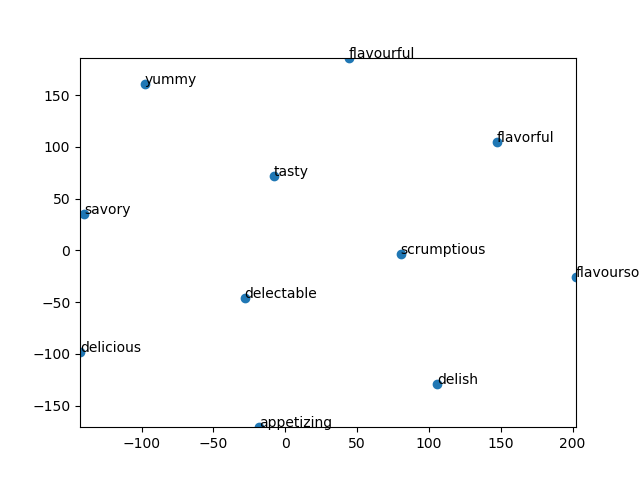

In [10]:
display_closestwords_tsnescatterplot(model, 'tasty')